In [1]:
suppressWarnings(suppressPackageStartupMessages({
    library(tidyverse)
    library(data.table)
}))


## Meta-analysis `wc -l` check

### Yosuke Tanigawa, 2020/11/6

In the input filtering for GWAS meta-analysis with Metal, we previously focused on associations where `P != 'NA'`.
Recently, we introduced additional filter, `ERRCODE == '.'`.
This may reduce the number of variants reported in the meta-analyzed results.

Here, we investigate the number of lines in meta-analyzed summary statistics and see if there is any difference.

- `wc_l_v1`: the number of lines based on meta-analysis without `ERRCODE == '.'` filter
- `wc_l_v2`: the number of lines based on meta-analysis with `ERRCODE == '.'` filter

We found that we have in total of 3340 meta-analyzed summary statistics.
Of which, 13 of them did not finish if we don't use `ERRCODE == '.'` filter.
For the remaining 3327 traits, 1,569 traits have the same number of variants.
The rest (1758 traits) have slightly different number of lines in the meta-analyzed summary statistics.


In [2]:
wc_l_v1_f <- '/oak/stanford/groups/mrivas/ukbb24983/exome/gwas/master_phe_20201002_exomeOQFE/__to_delete/metal_v2.wc_l.tsv'
wc_l_v2_f <- '/oak/stanford/groups/mrivas/ukbb24983/exome/gwas/master_phe_20201002_exomeOQFE/metal.wc_l.tsv'


In [6]:
wc_l_v1_f %>% fread() %>% rename('file'='#file') %>%
separate(file, c(rep(NA, 10), 'dirname', 'basename'), sep='/', remove=T, fill='right', extra='drop') -> wc_l_v1_df

wc_l_v2_f %>% fread() %>% rename('file'='#file') %>%
separate(file, c(rep(NA, 9), 'dirname', 'basename'), sep='/', remove=T, fill='right', extra='drop') -> wc_l_v2_df


In [9]:
bind_rows(wc_l_v1_df, wc_l_v2_df) %>%
spread(dirname, wc_l) -> df


In [15]:
wc_l_v1_df %>% dim() %>% print()
wc_l_v2_df %>% dim() %>% print()
df %>% dim() %>% print()


[1] 3327    3
[1] 3340    3
[1] 3340    3


In [16]:
df %>% filter(metal == metal_v2) %>% dim() %>% print()
df %>% filter(metal != metal_v2) %>% dim() %>% print()

[1] 1569    3
[1] 1758    3


In [23]:
df %>% 
ggplot(aes(x=metal, metal_v2)) +
geom_point(alpha=.5) +
theme_bw() +
labs(
    title = 'Number of lines (wc -l) in meta-analyzed summary statistics',
    x = "Pre-processing with ERRCODE == '.' filter",
    y = "Pre-processing without ERRCODE == '.' filter"
) -> p

Warning message:
“Removed 13 rows containing missing values (geom_point).”


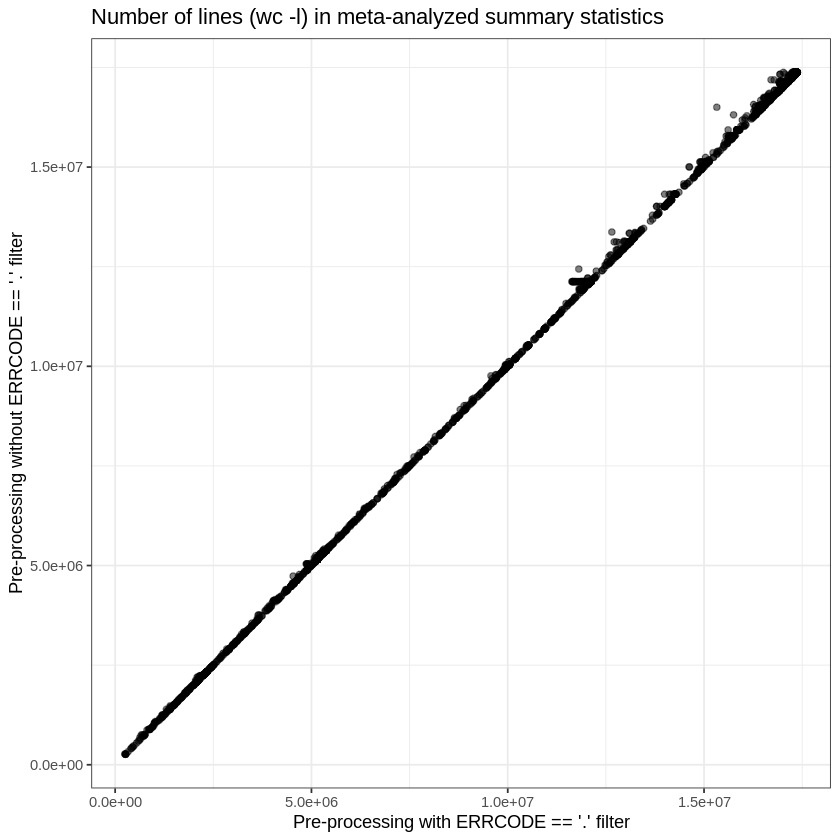

In [24]:
p